In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [2]:
crimes1 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes2 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')
print(crimes1)

            STATE/UT       DISTRICT  Year  Rape  Kidnapping and Abduction  \
0     ANDHRA PRADESH       ADILABAD  2001    50                        30   
1     ANDHRA PRADESH      ANANTAPUR  2001    23                        30   
2     ANDHRA PRADESH       CHITTOOR  2001    27                        34   
3     ANDHRA PRADESH       CUDDAPAH  2001    20                        20   
4     ANDHRA PRADESH  EAST GODAVARI  2001    23                        26   
...              ...            ...   ...   ...                       ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012     0                         0   
9013     LAKSHADWEEP          TOTAL  2012     0                         0   
9014      PUDUCHERRY       KARAIKAL  2012     6                         2   
9015      PUDUCHERRY     PUDUCHERRY  2012     7                        14   
9016      PUDUCHERRY          TOTAL  2012    13                        16   

      Dowry Deaths  Assault on women with intent to outrage her modesty  \


In [3]:
crimes = pd.concat([crimes1,crimes2],  ignore_index=False, axis=0)



In [4]:
# rename the STATE/UT column to STATE
crimes.rename(columns={'STATE/UT':'STATE'}, inplace=True)

In [5]:
# delete data sets post concat
del crimes1
del crimes2

In [6]:
print('Dataset is ready....')
# know the shape of dataset
crimes.shape

Dataset is ready....


(9840, 10)

In [7]:
# collect the state names in a list and print
states = crimes.STATE.unique()
print(states)

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry']


In [8]:
# do some data cleansing on state names

for i in range(0, len(states)):
    states[i] = states[i].lower()
    
for j in range(0, len(states)):
    if states[j] == 'a & n islands':
       states[j] = 'a&n islands'
    
    if  states[j] == 'd & n haveli':
        states[j] = 'd&n haveli'
      
print(states)

['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'chhattisgarh' 'goa'
 'gujarat' 'haryana' 'himachal pradesh' 'jammu & kashmir' 'jharkhand'
 'karnataka' 'kerala' 'madhya pradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'punjab' 'rajasthan' 'sikkim' 'tamil nadu'
 'tripura' 'uttar pradesh' 'uttarakhand' 'west bengal' 'a&n islands'
 'chandigarh' 'd&n haveli' 'daman & diu' 'delhi' 'lakshadweep'
 'puducherry' 'andhra pradesh' 'arunachal pradesh' 'assam' 'bihar'
 'chhattisgarh' 'goa' 'gujarat' 'haryana' 'himachal pradesh'
 'jammu & kashmir' 'jharkhand' 'karnataka' 'kerala' 'madhya pradesh'
 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha'
 'punjab' 'rajasthan' 'sikkim' 'tamil nadu' 'tripura' 'uttar pradesh'
 'uttarakhand' 'west bengal' 'a&n islands' 'chandigarh' 'd&n haveli'
 'daman & diu' 'delhi ut' 'lakshadweep' 'puducherry']


In [9]:
# remove duplicate state names from the list
states = np.unique(states).tolist()

print(states)

['a&n islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'd&n haveli', 'daman & diu', 'delhi', 'delhi ut', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala', 'lakshadweep', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']


In [10]:
# convert the state names to lower
crimes['STATE'] = crimes['STATE'].str.lower()
crimes.head(3)

,STATE,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,andhra pradesh,ADILABAD,2001,50,30,16,149,34,175,0
1,andhra pradesh,ANANTAPUR,2001,23,30,7,118,24,154,0
2,andhra pradesh,CHITTOOR,2001,27,34,14,112,83,186,0


In [11]:
crimes_total = crimes[crimes['DISTRICT'] == 'TOTAL']
# drop DISTRCT Column as we do not intend to use at this point
crimes_total.drop('DISTRICT', axis=1, inplace=True)
# filter out the Total crimes for each State & UT for the year 2001
crimes_total_2001 = crimes_total[crimes_total['Year'] == 2001]
crimes_total_2001.drop('Year', axis=1, inplace=True)
print(crimes_total_2001)

                 STATE  Rape  Kidnapping and Abduction  Dowry Deaths  \
28      andhra pradesh   871                       765           420   
42   arunachal pradesh    33                        55             0   
70               assam   817                      1070            59   
115              bihar   888                       518           859   
135       chhattisgarh   959                       171            70   
138                goa    12                         6             2   
169            gujarat   286                       857            67   
190            haryana   398                       297           285   
204   himachal pradesh   124                       105            10   
228    jammu & kashmir   169                       504            13   
253          jharkhand   567                       279           217   
285          karnataka   293                       271           220   
302             kerala   562                        97          

C:\Users\divya\AppData\Local\Temp\ipykernel_5524\510557514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_total.drop('DISTRICT', axis=1, inplace=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_5524\510557514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_total_2001.drop('Year', axis=1, inplace=True)


In [12]:
# Data of Rape crime committed in the year 2001 per state
x = crimes_total_2001['STATE'].values
y = crimes_total_2001['Rape'].values
x

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'lakshadweep', 'puducherry'], dtype=object)

In [13]:
y

array([ 871,   33,  817,  888,  959,   12,  286,  398,  124,  169,  567,
        293,  562, 2851, 1302,   20,   26,   52,   17,  790,  298, 1049,
          8,  423,  102, 1958,   74,  709,    3,   18,    6,    0,    0,
          9], dtype=int64)

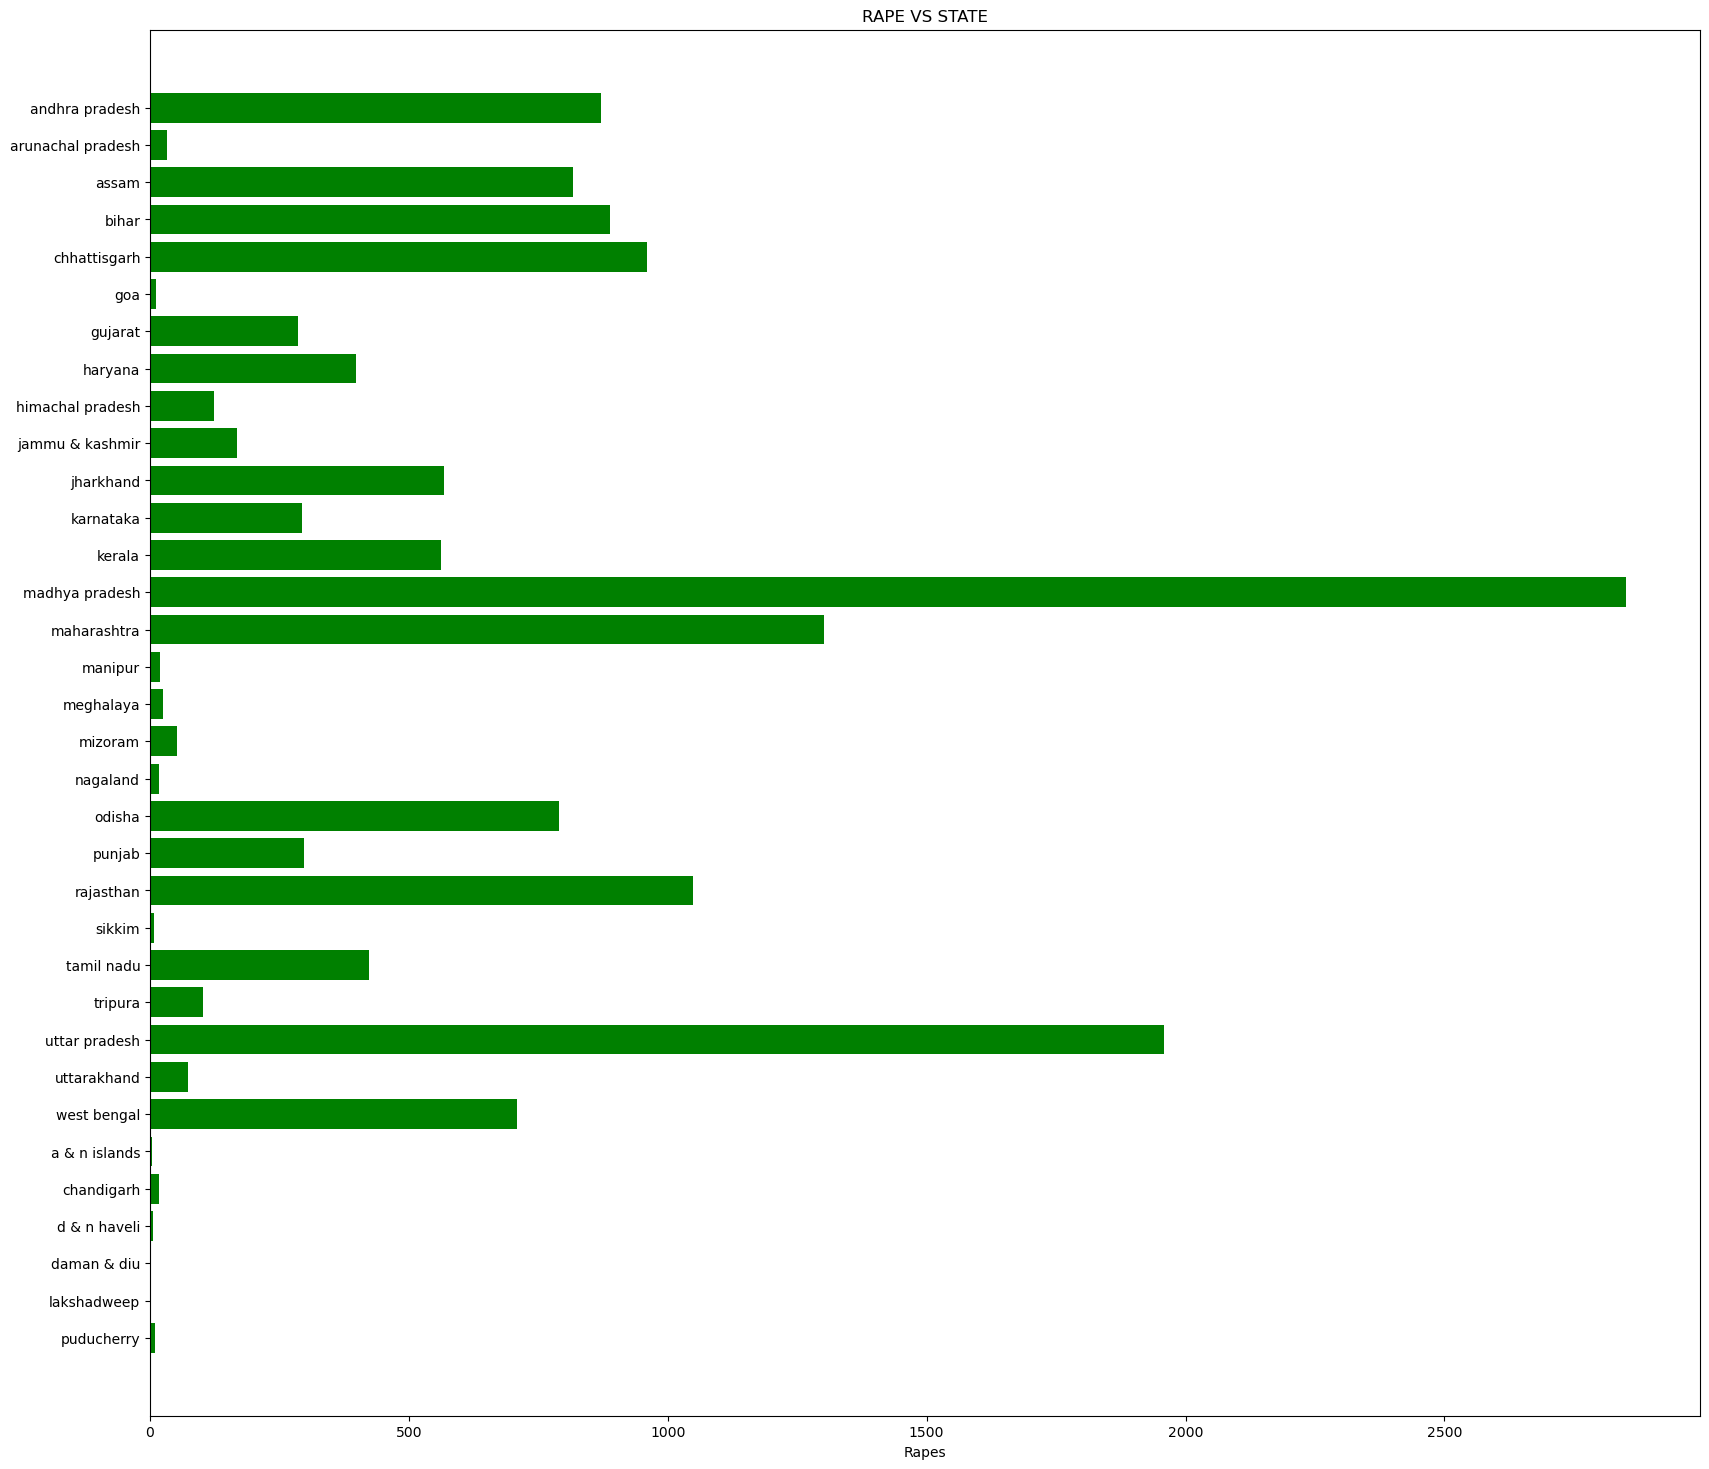

In [14]:
# plot the bar graph
fig, ax = plt.subplots()
crime_rape = crimes_total_2001['STATE'].values
y_pos = np.arange(len(crime_rape))
performance = crimes_total_2001['Rape'].values
ax.barh(y_pos, performance, align='center',color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(crime_rape)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rapes')
ax.set_title('RAPE VS STATE')
fig.set_size_inches(20, 18, forward=True)
plt.show()

In [15]:
# Any results you write to the current directory are saved as output.
# creating a new data set

crimes_total_women1 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes_total_women2 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')

In [16]:
crimes_total_women = pd.concat([crimes_total_women1,crimes_total_women2],  ignore_index=False, axis=0)
crimes_total_women.rename(columns={'STATE/UT':'STATE'}, inplace=True)

del crimes_total_women1
del crimes_total_women2

In [17]:
# Check if 'DISTRICT' column exists
if 'DISTRICT' in crimes_total_women.columns:
    # Filter rows where the district is 'TOTAL'
    crimes_total_women = crimes_total_women[crimes_total_women['DISTRICT'] == 'TOTAL']

    # Drop the 'DISTRICT' column
    crimes_total_women.drop('DISTRICT', axis=1, inplace=True)
else:
    # If 'DISTRICT' column doesn't exist, proceed without filtering

# Convert values to numeric in columns you're summing
    crimes_total_women.iloc[:, -9:-1] = crimes_total_women.iloc[:, -9:-1].apply(pd.to_numeric, errors='coerce')

# Sum the total crimes across different categories from 2001 to 2013 for each state
    crimes_total_women['Total Crimes'] = crimes_total_women.iloc[:, -9:-1].sum(axis=1)

# Group the data by the 'STATE' column and sum the total crimes
    crimes_total_women = crimes_total_women.groupby(['STATE'])['Total Crimes'].sum()


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
rape_data = pd.read_csv('input/20_Victims_of_rape.csv')
state_geo = pd.read_csv('input/poptable.csv')
#rape_data.rename(columns={'Area_Name': 'State'}, inplace=True)
rape_data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [20]:
state_geo.head()

,Unnamed: 0,State.Name,latitude,longitude
0,1,ANDAMAN AND NICOBAR,11.667026,92.735983
1,2,ANDHRA PRADESH,14.750429,78.570026
2,3,ARUNACHAL PRADESH,27.100399,93.616601
3,4,ASSAM,26.749981,94.216667
4,5,BIHAR,25.785414,87.479973


In [21]:
rape_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [22]:
'''def set_value(row_number, assigned_value): 
    return assigned_value[row_number]'''

latitude_mapping = {"Andaman & Nicobar Islands": 11.7400867, "Andhra Pradesh":15.91, "Arunachal Pradesh":28.21, "Assam":26.20, "Bihar":25.09
                , "Chandigarh":30.7333, "Chhattisgarh":21.27, "Dadra & Nagar Haveli":20.1809, "Daman & Diu":20.4283, "Delhi":28.7041, "Goa":15.29, "Gujarat":22.25
                , "Haryana":29.05, "Himachal Pradesh":31.10, "Jammu & Kashmir":33.77, "Jharkhand":23.61, "Karnataka":15.31, "Kerala":10.85,
                "Lakshadweep":10,"Madhya Pradesh":22.97,"Maharashtra":19.75,"Manipur":24.66,"Meghalaya":25.46,"Mizoram":23.16,"Nagaland":26.15,"Odisha":20.95,"Puducherry":11.9416,
                "Punjab":31.14,"Rajasthan":27.02,"Sikkim":27.53,"Tamil Nadu":11.12,"Tripura":23.94,"Uttar Pradesh":26.84,"Uttarakhand":30.06,"West Bengal":22.98}

#event_dictionary ={'Music' : 1500, 'Poetry' : 800, 'Comedy' : 1200} 
    
# Add a new column named 'Price' 
#df['Price'] = df['Event'].apply(set_value, args =(event_dictionary, )) 
#rape_data['Latitude'] = rape_data['Area_Name'].apply(set_value, args=(latitude_mapping))


rape_data['Latitude'] = rape_data['Area_Name'].map(latitude_mapping)
  

#print(rape_data) 

'''for dataset in rape_data.iteritems():
    #print(dataset)
    dataset['Latitude'] = dataset['Latitude'].map(latitude_mapping)
    #dataset[1] = dataset[1].map(latitude_mapping)
    #print(dataset)
    dataset['Latitude'] = dataset['Latitude'].fillna(0)'''
    
rape_data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Latitude
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0,11.740087
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0,11.740087
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0,11.740087
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0,11.740087
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0,11.740087


In [23]:
rape_data.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
Latitude                     0
dtype: int64

In [24]:
longitude_mapping = {"Andaman & Nicobar Islands": 92.6586, "Andhra Pradesh":79.74, "Arunachal Pradesh":94.72, "Assam":92.93, "Bihar":85.31
                , "Chandigarh":76.7794, "Chhattisgarh":81.86, "Dadra & Nagar Haveli":73.0169, "Daman & Diu":72.8397, "Delhi":77.1025, "Goa":74.12, "Gujarat":71.19
                , "Haryana":76.08, "Himachal Pradesh":77.17, "Jammu & Kashmir":76.57, "Jharkhand":85.27, "Karnataka":75.71, "Kerala":76.27,
                "Lakshadweep":72.1833,"Madhya Pradesh":78.65,"Maharashtra":75.71,"Manipur":93.90,"Meghalaya":91.36,"Mizoram":92.93,"Nagaland":94.56,"Odisha":85.09,"Puducherry":79.8083,
                "Punjab":75.34,"Rajasthan":74.21,"Sikkim":88.51,"Tamil Nadu":78.65,"Tripura":91.98,"Uttar Pradesh":80.94,"Uttarakhand":79.01,"West Bengal":87.85}

rape_data['Longitude'] = rape_data['Area_Name'].map(longitude_mapping)

In [25]:
rape_data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Latitude,Longitude
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0,11.740087,92.6586
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0,11.740087,92.6586
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0,11.740087,92.6586
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0,11.740087,92.6586
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0,11.740087,92.6586


<Axes: xlabel='Longitude', ylabel='Latitude'>

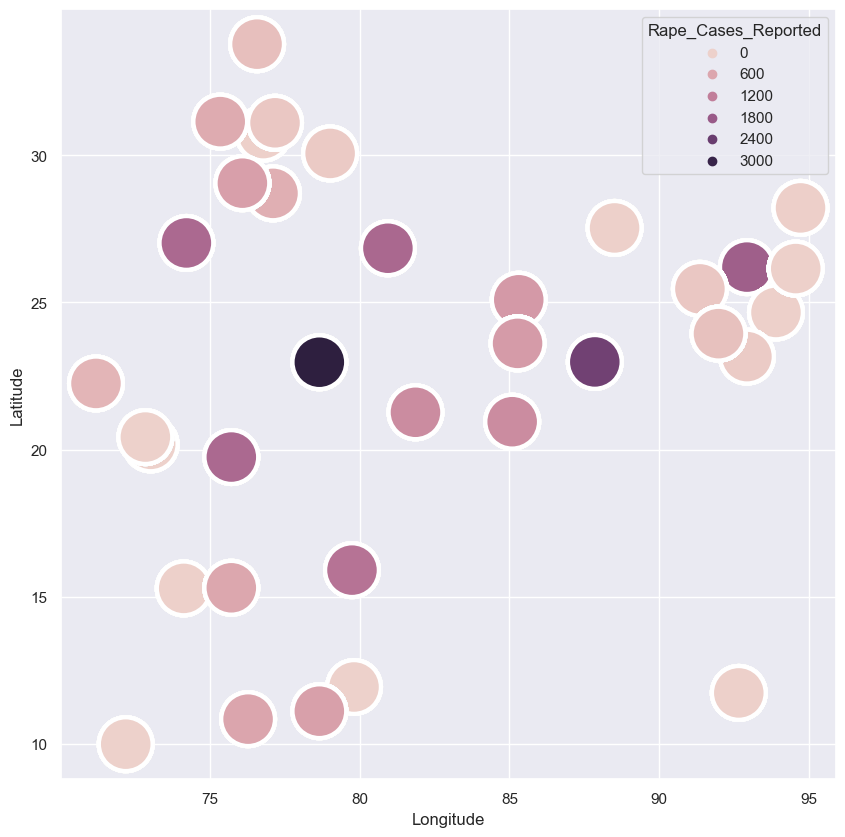

In [26]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x='Longitude', y='Latitude', hue='Rape_Cases_Reported',s=1500, data=rape_data)

C:\Users\divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

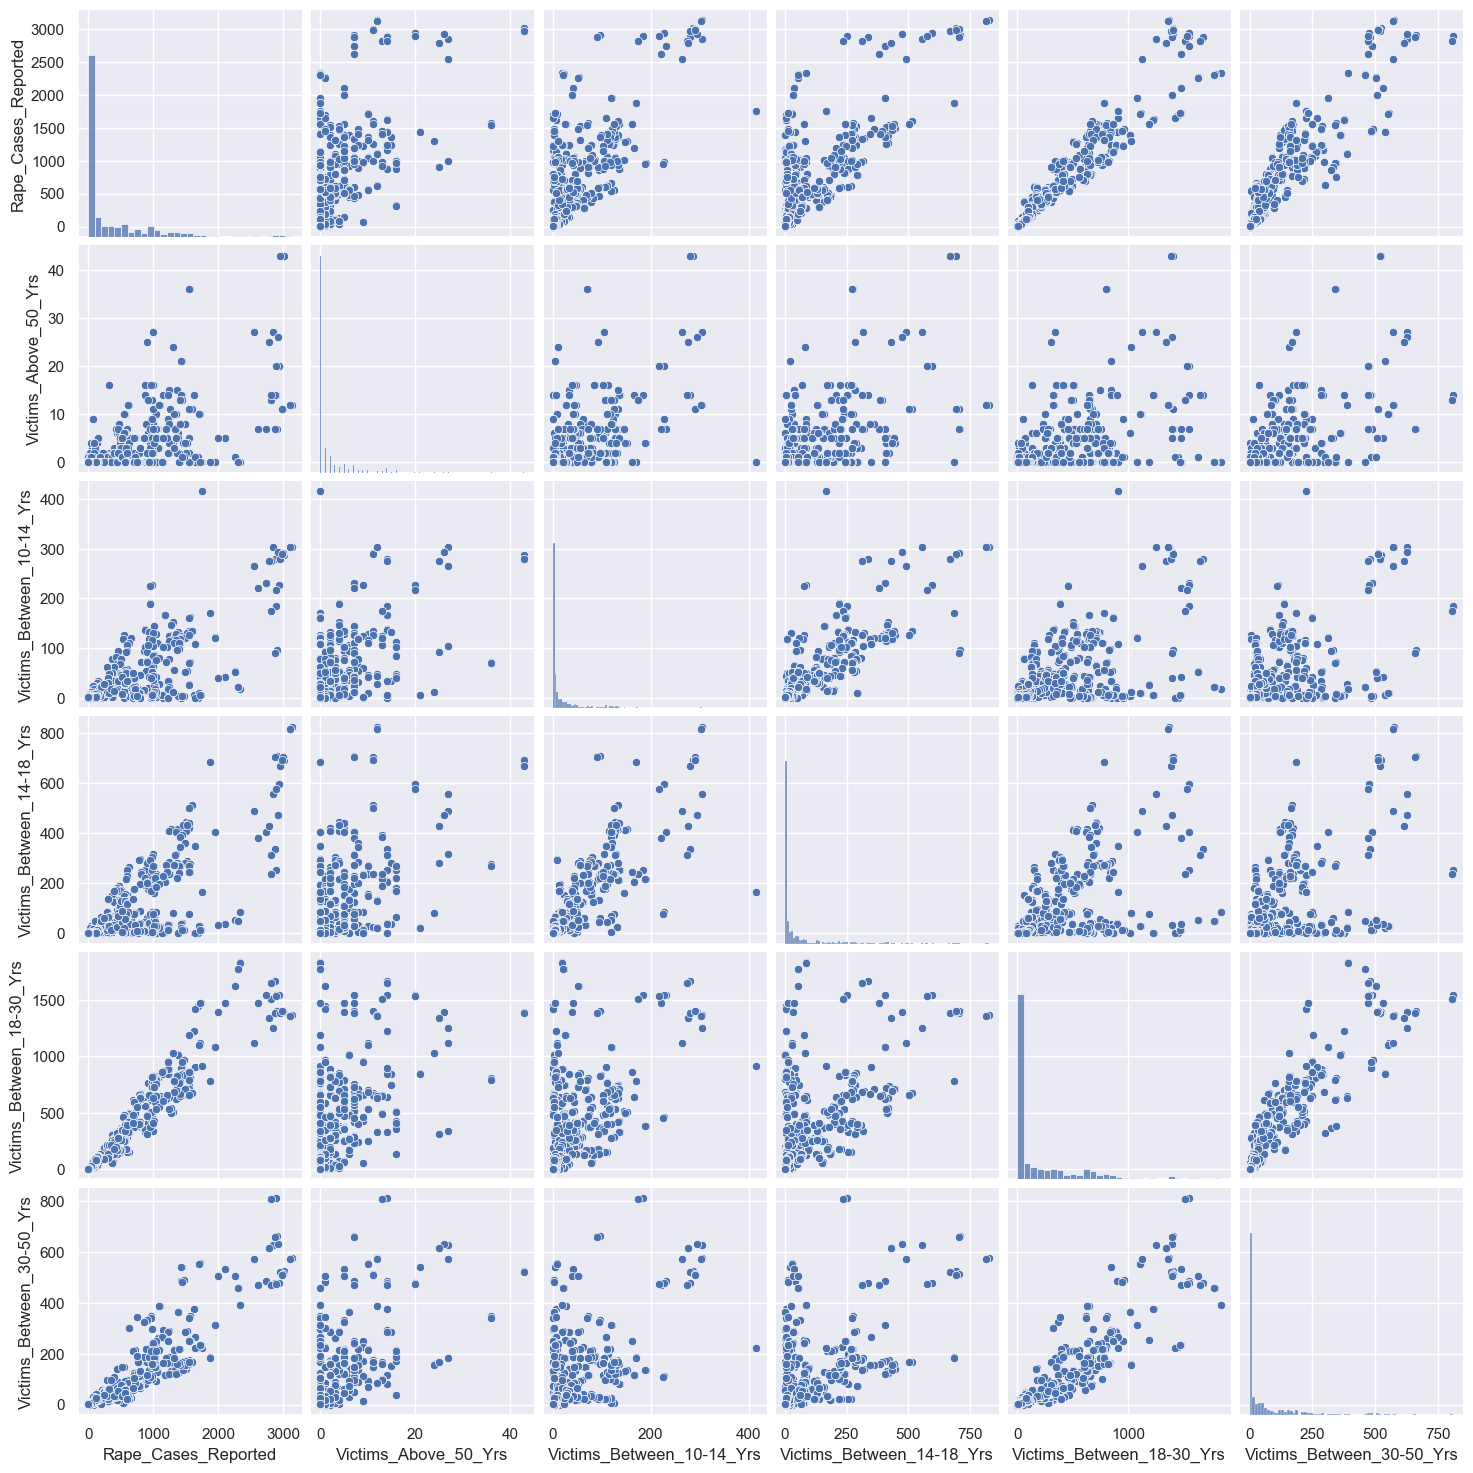

In [27]:
sns.pairplot(rape_data, vars=["Rape_Cases_Reported", "Victims_Above_50_Yrs","Victims_Between_10-14_Yrs", "Victims_Between_14-18_Yrs","Victims_Between_18-30_Yrs","Victims_Between_30-50_Yrs"])

<Axes: xlabel='Rape_Cases_Reported', ylabel='Area_Name'>

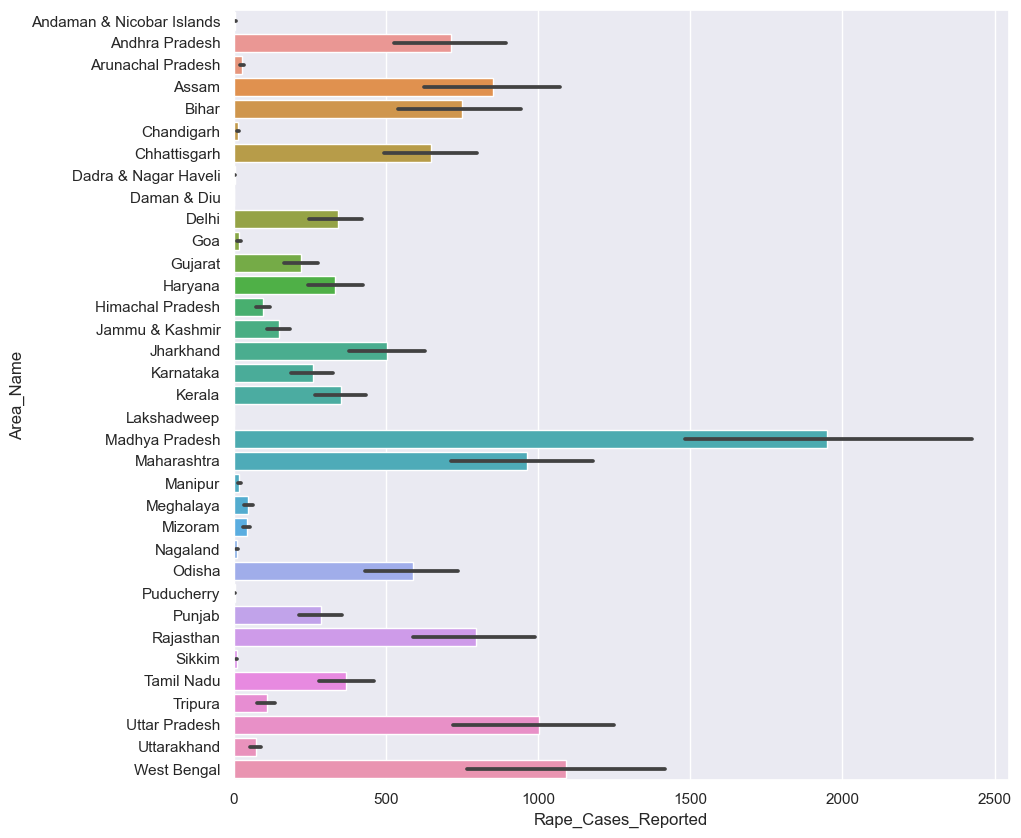

In [28]:
sns.barplot(x="Rape_Cases_Reported", y="Area_Name", data=rape_data)

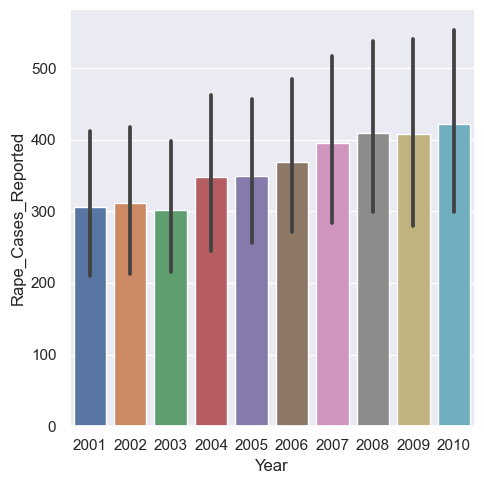

In [29]:
sns.catplot(x="Year", y="Rape_Cases_Reported", data=rape_data, kind='bar')

In [30]:
dw_crime_against_women = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')
dw_crime_against_women

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,Andhra Pradesh,ADILABAD,2013,61,47,12,197,138,464,0
1,Andhra Pradesh,ANANTAPUR,2013,28,84,23,337,43,161,0
2,Andhra Pradesh,CHITTOOR,2013,31,27,13,119,84,435,0
3,Andhra Pradesh,CUDDAPAH,2013,19,50,9,318,163,207,0
4,Andhra Pradesh,CYBERABAD,2013,138,129,43,350,338,1526,0
...,...,...,...,...,...,...,...,...,...,...
818,Lakshadweep,LAKSHADWEEP,2013,2,0,0,1,0,0,0
819,Lakshadweep,ZZ TOTAL,2013,2,0,0,1,0,0,0
820,Puducherry,KARAIKAL,2013,6,2,1,1,1,1,0
821,Puducherry,PUDUCHERRY,2013,11,23,0,11,7,7,0


In [31]:
dw_crime_against_women.DISTRICT.unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'CYBERABAD',
       'EAST GODAVARI', 'GUNTAKAL RLY.', 'GUNTUR', 'GUNTUR URBAN',
       'HYDERABAD CITY', 'KARIMNAGAR', 'KHAMMAM', 'KRISHNA', 'KURNOOL',
       'MAHABOOBNAGAR', 'MEDAK', 'NALGONDA', 'NELLORE', 'NIZAMABAD',
       'PRAKASHAM', 'RAJAHMUNDRY', 'RANGA REDDY', 'SECUNDERABAD RLY.',
       'SRIKAKULAM', 'TIRUPATHI URBAN', 'VIJAYAWADA CITY',
       'VIJAYAWADA RLY.', 'VISAKHA RURAL', 'VISAKHAPATNAM',
       'VIZIANAGARAM', 'WARANGAL', 'WARANGAL URBAN', 'WEST GODAVARI',
       'ZZ TOTAL', 'ANJAW', 'CHANGLANG', 'DIBANG VALLEY', 'K/KUMEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'LONGDING', 'PAPUM PARE',
       'RURAL', 'SIANG EAST', 'SIANG UPPER', 'SIANG WEST',
       'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG', 'TIRAP',
       'UPPER DIBANG VALLEY', 'BAKSA', 'BARPETA', 'BIEO', 'BONGAIGAON',
       'C.I.D.', 'CACHAR', 'CHIRANG', 'DARRANG', 'DHEMAJI', 'DHUBRI',
       'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT', 'GU

In [32]:
#dw_crime_against_women.to_csv(r'../File_Name.csv')
dw_crime_against_women.to_csv('mycsvfile.csv',index=False)

In [33]:
data = pd.read_csv('mycsvfile.csv')

In [34]:
data

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,Andhra Pradesh,ADILABAD,2013,61,47,12,197,138,464,0
1,Andhra Pradesh,ANANTAPUR,2013,28,84,23,337,43,161,0
2,Andhra Pradesh,CHITTOOR,2013,31,27,13,119,84,435,0
3,Andhra Pradesh,CUDDAPAH,2013,19,50,9,318,163,207,0
4,Andhra Pradesh,CYBERABAD,2013,138,129,43,350,338,1526,0
...,...,...,...,...,...,...,...,...,...,...
818,Lakshadweep,LAKSHADWEEP,2013,2,0,0,1,0,0,0
819,Lakshadweep,ZZ TOTAL,2013,2,0,0,1,0,0,0
820,Puducherry,KARAIKAL,2013,6,2,1,1,1,1,0
821,Puducherry,PUDUCHERRY,2013,11,23,0,11,7,7,0


# Decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('input/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [36]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.6271951831409934
negative instance percentage is  0.37280481685900657


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
initial=pd.read_csv('input/communities-crime-clean.csv')
initial.head()
initial.drop('communityname',axis=1,inplace=True)
initial.drop('ViolentCrimesPerPop', axis=1,inplace=True)
initial.drop('fold', axis=1,inplace=True)

initial.drop('state', axis=1,inplace=True)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Define the cross-validation splitter
kf = KFold(n_splits=10)

# Use cross-validation with the defined splitter
scores = cross_val_score(clf, initial, Y, cv=kf, scoring='accuracy')

print('cross_val_accuracy is ', scores) 
print('cross_val_accuracy_avg is ', np.array(scores).mean())


scores = cross_val_score(clf, initial, Y, cv=kf, scoring='precision')
print('cross_val_precision is ', scores) 
print('cross_val_precision_avg is ', np.array(scores).mean())

scores = cross_val_score(clf, initial, Y, cv=kf, scoring='recall')
print('cross_val_recall is ', scores) 
print('cross_val_recall_avg is ', np.array(scores).mean())


cross_val_accuracy is  [0.87       0.91       0.86       0.74371859 0.72361809 0.81407035
 0.85929648 0.7839196  0.84422111 0.78894472]
cross_val_accuracy_avg is  0.8197788944723617
cross_val_precision is  [0.90643275 0.93258427 0.93023256 0.86538462 0.82051282 0.80681818
 0.89719626 0.8125     0.8961039  0.73148148]
cross_val_precision_avg is  0.8599246833323706
cross_val_recall is  [0.93939394 0.96511628 0.86330935 0.70866142 0.60952381 0.78021978
 0.84955752 0.69892473 0.90196078 0.85869565]
cross_val_recall_avg is  0.8175363267842446


In [39]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 83.59257400903161
Precesion is 90.02601908065915
Recall is 83.04


In [40]:
DT_acc = accuracy_score(Y,y_pred)*100
print(DT_acc)

83.59257400903161


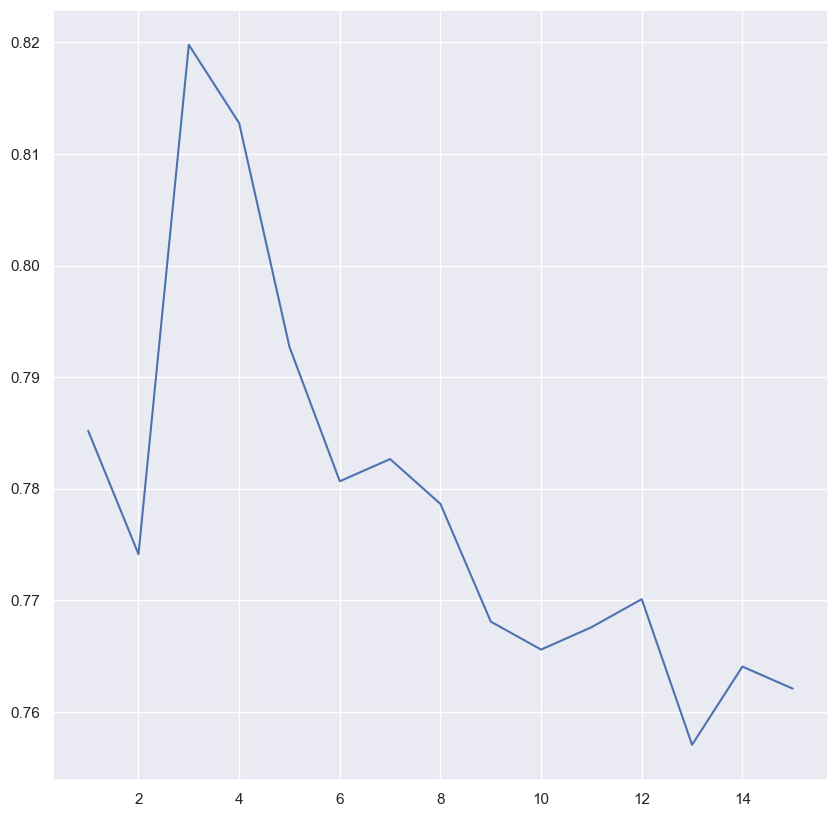

In [41]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(clf, initial, Y, cv=kf, scoring='accuracy')
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()



In [42]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [34  3  5 44]
4_max_normalized_feature is  [0.02314019 0.08646058 0.04512009 0.3620976 ]
34
feature_name[index] is  PctEmplManu
3
feature_name[index] is  racePctWhite
5
feature_name[index] is  racePctHisp
44
feature_name[index] is  PctKids2Par


# NaiveBayes-Gaussian

In [43]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Assuming initial is your feature matrix and Y is your target vector
gnb = GaussianNB()

# Fit the Gaussian Naive Bayes classifier and predict
y_pred = gnb.fit(initial, Y).predict(initial)

# Calculate mislabeling count
mislabel_num = (Y != y_pred).sum()
print("Mislabeling count is ", mislabel_num)

# Calculate variance for each feature and each class
variance = np.var(initial, axis=0)

# Calculate standard deviation for each feature and each class
stand_deviation = np.sqrt(variance)

# Sum of standard deviation for the first two classes
sum_standard = np.sum(stand_deviation[:2])

# Calculate mean for each feature and each class
mean = gnb.theta_

# Calculate the absolute difference between means of the first two classes
difference = np.abs(mean[0] - mean[1])

# Calculate normalized feature importance
normalized_feature = difference / sum_standard

print('Standard deviation:', stand_deviation)
print('Sum of standard deviation:', sum_standard)
print('Absolute difference between means:', difference)
print('Normalized feature importance:', normalized_feature)


Mislabeling count is  442
Standard deviation: population             0.126903
householdsize          0.163706
racepctblack           0.252807
racePctWhite           0.243746
racePctAsian           0.208853
                         ...   
PctSameState85         0.198203
LandArea               0.109458
PopDens                0.203076
PctUsePubTrans         0.229041
LemasPctOfficDrugUn    0.240319
Length: 100, dtype: float64
Sum of standard deviation: 0.29060910698913084
Absolute difference between means: [0.05925985 0.02754532 0.20970948 0.25426695 0.03400939 0.14958682
 0.01336427 0.04669012 0.03282941 0.02496266 0.05793819 0.03660317
 0.17500688 0.09893139 0.04483953 0.19882852 0.0331872  0.20786638
 0.01743097 0.16861724 0.13188718 0.09159017 0.08676146 0.01742329
 0.07996991 0.04179559 0.10544002 0.06794633 0.19998233 0.15111679
 0.16784284 0.14162636 0.17083072 0.09473403 0.02357131 0.04875455
 0.10439157 0.12939899 0.19256169 0.0693055  0.20242964 0.20754377
 0.01752361 0.23556545 

In [44]:
ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])


ind is  [40 41 17 77  2 50  3 43 44 45]
10_max_normalized_feature is  [0.69657019 0.71416817 0.71527827 0.7254607  0.72162047 0.79654507
 0.87494488 0.81059211 0.8662694  0.79973851]
40
feature_name[index] is  FemalePctDiv
41
feature_name[index] is  TotalPctDiv
17
feature_name[index] is  pctWPubAsst
77
feature_name[index] is  PctHousNoPhone
2
feature_name[index] is  racepctblack
50
feature_name[index] is  PctIlleg
3
feature_name[index] is  racePctWhite
43
feature_name[index] is  PctFam2Par
44
feature_name[index] is  PctKids2Par
45
feature_name[index] is  PctYoungKids2Par


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Define the cross-validation splitter
kf = KFold(n_splits=10)

# Use cross-validation with the defined splitter
scores = cross_val_score(gnb, initial, Y, cv=kf, scoring='accuracy')

print('cross_val_accuracy is ', scores) 
print('cross_val_accuracy_avg is ', np.array(scores).mean())


scores = cross_val_score(gnb, initial, Y, cv=kf, scoring='precision')
print('cross_val_precision is ', scores) 
print('cross_val_precision_avg is ', np.array(scores).mean())

scores = cross_val_score(gnb, initial, Y, cv=kf, scoring='recall')
print('cross_val_recall is ', scores) 
print('cross_val_recall_avg is ', np.array(scores).mean())

cross_val_accuracy is  [0.78       0.77       0.82       0.72361809 0.65326633 0.78894472
 0.83919598 0.7839196  0.77386935 0.74371859]
cross_val_accuracy_avg is  0.7676532663316583
cross_val_precision is  [0.9352518  0.96323529 0.98130841 0.91860465 0.86       0.85507246
 0.95505618 0.87878788 0.93548387 0.72527473]
cross_val_precision_avg is  0.9008075273630285
cross_val_recall is  [0.78787879 0.76162791 0.75539568 0.62204724 0.40952381 0.64835165
 0.75221239 0.62365591 0.75816993 0.7173913 ]
cross_val_recall_avg is  0.683625462262609


In [46]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 77.82237832413446
Precesion is 93.16239316239316
Recall is 69.76


In [47]:
GNB_acc = accuracy_score(Y,y_pred)*100
GNB_acc

77.82237832413446

# K-NN

In [48]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv('input/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('input/communities-crime-clean.csv')
Y = df['highCrime']
fold=df['fold']
state=df['state']
community=df['communityname']
initial.drop('fold',axis=1,inplace=True)
initial.drop('state', axis=1,inplace=True)
initial.drop('communityname', axis=1,inplace=True)
initial.drop('ViolentCrimesPerPop',axis=1,inplace=True)

In [ ]:
x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(initial)
    pcdf = pca.transform(initial)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(clf, initial, Y, cv=kf, scoring='accuracy')
        y[j-1].append(np.mean(scores))
    x.append(i)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

In [ ]:
plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming initial is your feature matrix

# Standardize your data
scaler = StandardScaler()
initial_scaled = scaler.fit_transform(initial)

# Apply PCA
pca = PCA(n_components=5)
pca.fit(initial_scaled)

# Transform your data
pcdf = pca.transform(initial_scaled)

# Now pcdf contains the transformed data
print(pcdf)


In [ ]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

In [ ]:
KNN_acc = accuracy_score(Y,y_pred)*100
KNN_acc

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Define the cross-validation splitter
kf = KFold(n_splits=10)

# Use cross-validation with the defined splitter
scores = cross_val_score(knn, pcdf, Y, cv=kf, scoring='accuracy')
print('cross_val_accuracy is ', scores) 
print('cross_val_accuracy_avg is ', np.array(scores).mean()*100)

scores = cross_val_score(knn, pcdf, Y, cv=kf, scoring='precision')
print('cross_val_accuracy is ', scores) 
print('cross_val_accuracy_avg is ', np.array(scores).mean()*100)

scores = cross_val_score(knn, pcdf, Y, cv=kf, scoring='recall')
print('cross_val_recall is ', scores) 
print('cross_val_recall_avg is ', np.array(scores).mean()*100)

# Boosted Decesion Tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator= model,n_estimators=400,learning_rate=1)

In [ ]:
AdaBoost.fit(initial, Y)

In [ ]:
prediction = AdaBoost.score(initial, Y)

In [ ]:
print('The accuracy is: ',prediction*100,'%')

In [ ]:
BoostedDT = prediction*100

# Comparsion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [DT_acc,GNB_acc,KNN_acc,BoostedDT]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['Decision Tree', 'Guassian Navie Bayes','K-N- Neighbours','Boosted Decision Tree']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.
    
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")